## Load and import stuff

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [ ]:

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('../logs/log-2025-03-25_14-52-13.csv')

df_soc = df['battery.4']
df_soc = df_soc.tail(df_soc.shape[0] - 2)

df_soc = df_soc.astype(float)

df_node = df['node.1']
df_node = df_node.tail(df_node.shape[0] - 2)
df_node = df_node.astype(float)

df_node2 = df['node']
df_node2 = df_node2.tail(df_node2.shape[0] - 2)
df_node2 = df_node2.astype(float)

df_pv = df['pv_spain.2']
df_pv = df_pv.tail(df_pv.shape[0] - 2)
df_pv = df_pv.astype(float)

print(df_soc)
print(df_soc.dtypes)


2     0.5
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
Name: battery.4, dtype: float64
float64


In [26]:
print(df.head())

   balancing     balancing.1 balancing.2        battery       battery.1  \
0          0               0           0              0               0   
1  loss_load  overgeneration      reward  charge_amount  current_charge   
2        0.0            42.5       -85.0            0.0            50.0   
3        7.5             0.0       -75.0            0.0             0.0   
4        7.5             0.0       -75.0            0.0             0.0   

          battery.2 battery.3 battery.4      node               node.1  ...  \
0                 0         0         0         0                    0  ...   
1  discharge_amount    reward       soc  load_met         node_current  ...   
2              50.0      -0.0       0.5       7.5    -41.7881511358717  ...   
3               0.0      -0.0       0.0       7.5  -17.168360097022767  ...   
4               0.0      -0.0       0.0       7.5  -13.611087213852187  ...   

  balance      balance.1                      balance.2  \
0       0      

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


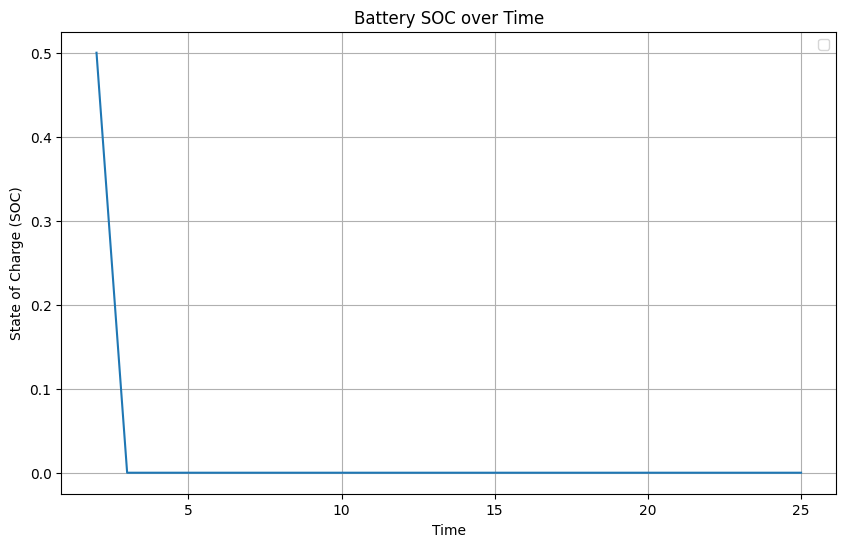

In [27]:
# Plot battery charge
# 1. Battery State of Charge (SOC) over Time
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_soc.index, df_soc)
plt.xlabel('Time')
plt.ylabel('State of Charge (SOC)')
plt.title('Battery SOC over Time')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


In [28]:
# plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
# plt.plot(df_node.index, df_node)
# plt.xlabel('Time')
# plt.ylabel('Node Consumption over Time')
# plt.title('Node Consumption (kWh)')
# plt.legend()
# plt.grid(True)  # Add a grid for better readability
# plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


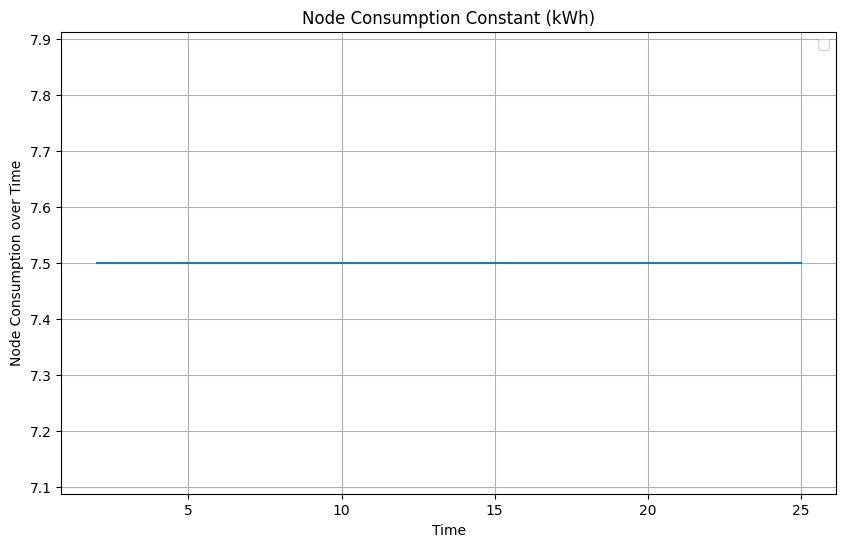

In [29]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_node2.index, df_node2)
plt.xlabel('Time')
plt.ylabel('Node Consumption over Time')
plt.title('Node Consumption Constant (kWh)')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


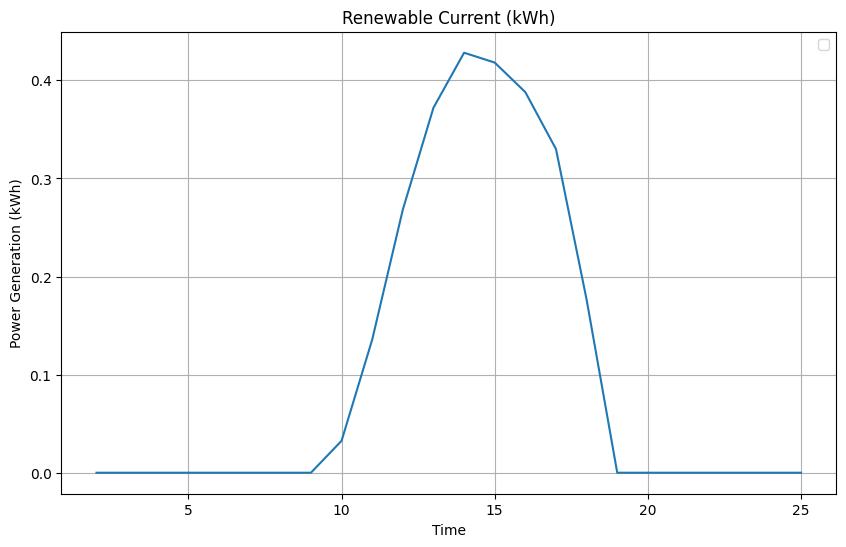

In [30]:
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
plt.plot(df_pv.index, df_pv)
plt.xlabel('Time')
plt.ylabel('Power Generation (kWh)')
plt.title('Renewable Current (kWh)')
plt.legend()
plt.grid(True)  # Add a grid for better readability
plt.show()


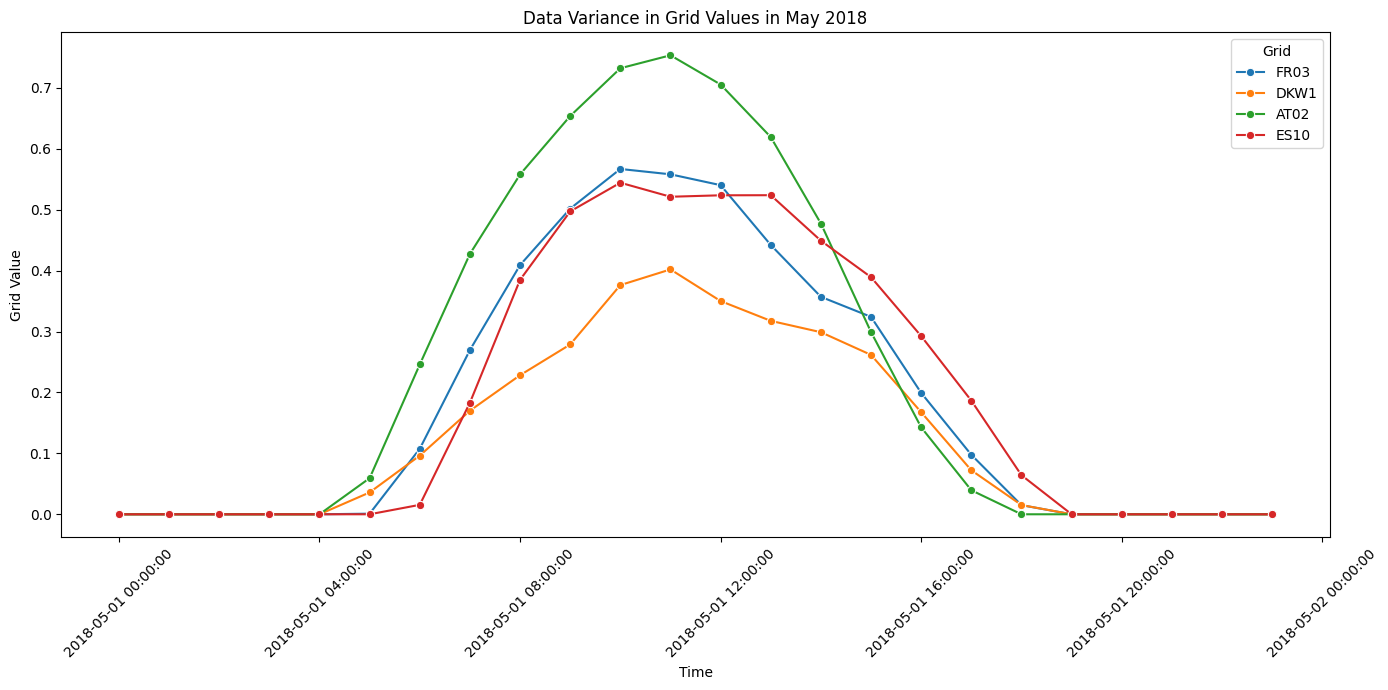

In [14]:
df = pd.read_csv('D:\Github\python-microgrid-realtime\data\solarPV.csv', parse_dates=['Time'])

# Ensure 'Time' column is datetime
df['Time'] = pd.to_datetime(df['Time'])

# --- Step 2: Filter data for May 2018 ---
df_may_2018 = df[(df['Time'].dt.year == 2018) & (df['Time'].dt.month == 5)]

# --- Step 3: Select relevant columns and first 24 entries ---
columns_of_interest = ['Time', 'FR03', 'DKW1', 'AT02', 'ES10']
df_may_2018_24 = df_may_2018[columns_of_interest].iloc[:24]
df_may_2018_24.to_csv('data.csv', index=False)

# --- Step 4: Prepare data for Seaborn (melt into long format) ---
df_melted = df_may_2018_24.melt(id_vars='Time', var_name='Grid', value_name='Value')

# --- Step 5: Plot using Seaborn ---
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted, x='Time', y='Value', hue='Grid', marker='o')

plt.xlabel('Time')
plt.ylabel('Grid Value')
plt.title('Data Variance in Grid Values in May 2018')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Set full timestamp format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))

# Show fewer ticks (approx every 3rd label)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=8))

plt.tight_layout()
plt.show()

In [3]:
import os
import csv

# Your folder containing the CSV files
folder_path = r'D:\Github\python-microgrid-realtime\data\emissions'
output_file_averages = 'averages.txt'
output_file_zone_ids = 'zone_ids.txt'

results = []
zone_ids_set = set()  # To store unique Zone ids

for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as csvfile:
            reader = csv.DictReader(csvfile)

            # Peek at the first non-empty row to check the country
            first_row = next((row for row in reader if any(row.values())), None)
            if not first_row or first_row.get('Country') == 'Ukraine':
                continue  # Skip this file

            # Process the file
            total_cfe = 0.0
            total_co2 = 0.0
            count = 0
            zone_id = first_row['Zone id']
            zone_ids_set.add(zone_id)  # Add to unique set of zone ids

            try:
                cfe = float(first_row['Carbon-free energy percentage (CFE%)'])
                total_cfe += cfe
                co2 = float(first_row['Carbon intensity gCO₂eq/kWh (direct)'])
                total_co2 += co2
                count += 1
            except ValueError:
                pass  # Ignore invalid first row

            for row in reader:
                try:
                    cfe = float(row['Carbon-free energy percentage (CFE%)'])
                    total_cfe += cfe
                    co2 = float(row['Carbon intensity gCO₂eq/kWh (direct)'])
                    total_co2 += co2
                    count += 1
                    zone_ids_set.add(row['Zone id'])  # Add zone id to the set
                except ValueError:
                    continue

            if count > 0:
                avg_cfe = total_cfe / count
                avg_co2 = total_co2 / count
                results.append((zone_id, avg_cfe, avg_co2))

# Write averages to the first text file
with open(output_file_averages, 'w') as f:
    for zone_id, avg_cfe, avg_co2 in results:
        f.write(f'({zone_id}, {avg_cfe:.2f}, {avg_co2:.2f})\n')

# Write unique Zone ids to the second text file
with open(output_file_zone_ids, 'w') as f:
    f.write('{')
    f.write(', '.join(zone_ids_set))
    f.write('}\n')

print(f'Done. Averages written to {output_file_averages} and Zone ids written to {output_file_zone_ids}')


Done. Averages written to averages.txt and Zone ids written to zone_ids.txt
